In [59]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # --- 1. Load Datasets ---
# symptoms_df = pd.read_csv('dataset/diseases.csv')
# lifestyle_df = pd.read_csv('dataset/lifestyle.csv')

# # Drop unwanted first columns (ID or Unnamed)
# lifestyle_df.drop(lifestyle_df.columns[0], axis=1, inplace=True)

# # Drop duplicates in symptoms_df (if any)
# symptoms_df.drop_duplicates(inplace=True)

# # --- 2. Check if the number of rows match ---
# print(f"Symptoms DataFrame rows: {symptoms_df.shape[0]}")
# print(f"Lifestyle DataFrame rows: {lifestyle_df.shape[0]}")

# # --- 3. Align Datasets Properly ---
# # Check if the number of rows in both datasets match
# if symptoms_df.shape[0] != lifestyle_df.shape[0]:
#     print("Warning: Number of rows in both datasets do not match.")
    
#     # Filling the missing rows in lifestyle_df with forward fill
#     if symptoms_df.shape[0] > lifestyle_df.shape[0]:
#         print("Filling missing rows in lifestyle_df with forward fill...")
#         lifestyle_df = lifestyle_df.reindex(range(symptoms_df.shape[0]), method='ffill')
#     else:
#         print("Truncating lifestyle_df to match symptoms_df...")
#         lifestyle_df = lifestyle_df.iloc[:symptoms_df.shape[0]]

# # --- 4. Encode 'Risk_Level' in lifestyle_df ---
# label_encoder = LabelEncoder()
# lifestyle_df['Risk_Level_Encoded'] = label_encoder.fit_transform(lifestyle_df['Risk_Level'])

# # --- 5. Concatenate 'Risk_Level' from lifestyle_df into symptoms_df ---
# symptoms_df['Risk_Level'] = lifestyle_df['Risk_Level_Encoded']

# # --- 6. Check the final DataFrame ---
# print("\nFinal Symptoms DataFrame with Risk Level:")
# # print(symptoms_df.head())

# # Save the final concatenated dataframe (optional)
# symptoms_df.to_csv('symptoms_df.csv', index=False)
# print("Symptoms_df shape:", symptoms_df.shape)
# print("Lifestyle_df shape:", lifestyle_df.shape)

# print("\nSymptoms_df rows:")
# print(symptoms_df.head(), symptoms_df.tail())

# print("\nLifestyle_df rows:")
# print(lifestyle_df.head(), lifestyle_df.tail())



In [107]:
import numpy as np 
import pandas as pd 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [108]:
"""
MODEL BUILDING
"""

data_path = "dataset/symptoms_df.csv"
df = pd.read_csv(data_path)

# Reading the train.csv by removing the 
# last column since it's an empty column
datacols = ['itching', 'skin_rash', 'joint_pain', 'vomiting', 'fatigue', 'cough',
 'high_fever', 'headache', 'yellowish_skin', 'nausea', 'loss_of_appetite',
 'abdominal_pain', 'diarrhoea', 'chest_pain', 'dizziness', 'excessive_hunger',
 'swelling_joints', 'loss_of_balance', 'irritability', 'painful_walking' ,'prognosis' , 'Risk_Level']

# symptoms_to_drop = [
#     # Previously dropped
#     "extra_marital_contacts", "receiving_unsterile_injections", "receiving_blood_transfusion",
#     "history_of_alcohol_consumption", "coma", "distention_of_abdomen", "fluid_overload",
#     "toxic_look_(typhos)", "enlarged_thyroid", "abnormal_menstruation", "dischromic _patches",
#     "blackheads", "scurring", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails",
#     "yellow_crust_ooze", "blister", "red_sore_around_nose", "pus_filled_pimples", "rusty_sputum",
#     "mucoid_sputum", "prominent_veins_on_calf", "blood_in_sputum", "stomach_bleeding",
#     "swollen_blood_vessels", "visual_disturbances", "lack_of_concentration", "altered_sensorium",
#     "polyuria", "palpitations", "slurred_speech", "watering_from_eyes",
#     "obesity", "brittle_nails", "puffy_face_and_eyes", "drying_and_tingling_lips",
#     "passage_of_gases", "irritation_in_anus", "foul_smell_of urine", "continuous_feel_of_urine",
#     "unsteadiness", "spinning_movements", "weakness_of_one_body_side", "loss_of_smell",
#     "movement_stiffness", "swelling_joints", "hip_joint_pain", "knee_pain", "neck_pain",
#     "cramps", "bruising", "painful_walking", "pain_in_anal_region", "pain_during_bowel_movements",
#     "sinus_pressure", "congestion", "phlegm", "blurred_and_distorted_vision", "swollen_legs",
#     "swollen_extremeties", "muscle_wasting", "redness_of_eyes", "cold_hands_and_feets"
# ]

df = df[datacols]
# df = df.drop(columns=symptoms_to_drop)
# df.head()
df.shape
# print(df[df['high_fever'] == 1]['prognosis'].value_counts())

# df.dropna()





(304, 22)

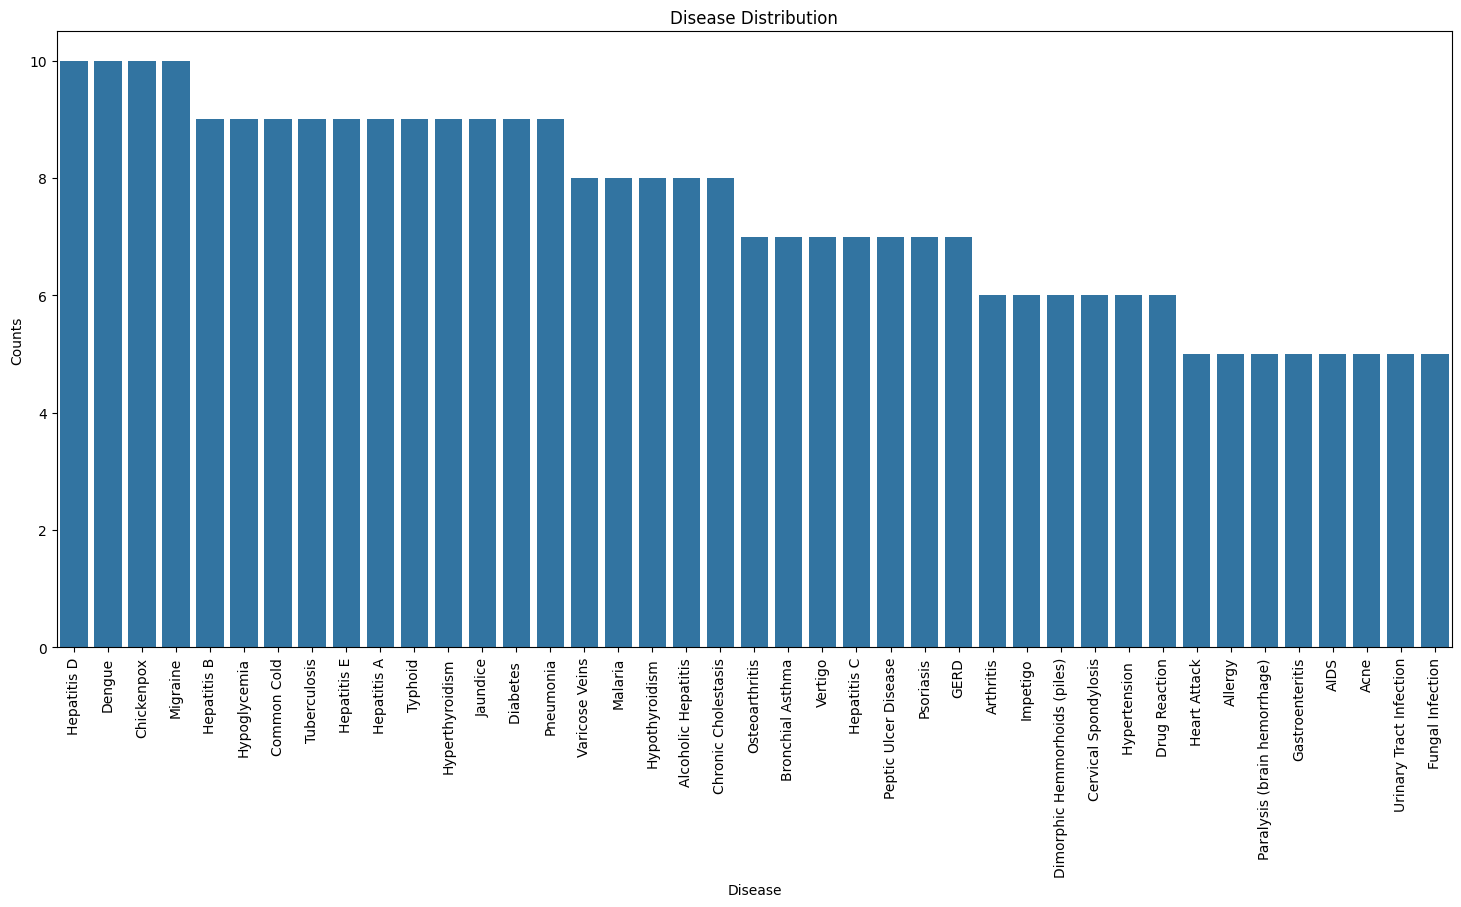

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame that contains the 'prognosis' column
disease_counts = df['prognosis'].value_counts()

# Create a new DataFrame for plotting
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

# Plotting
plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data=temp_df)  # Corrected the 'data' argument
plt.xticks(rotation=90)
plt.title('Disease Distribution')
plt.show()


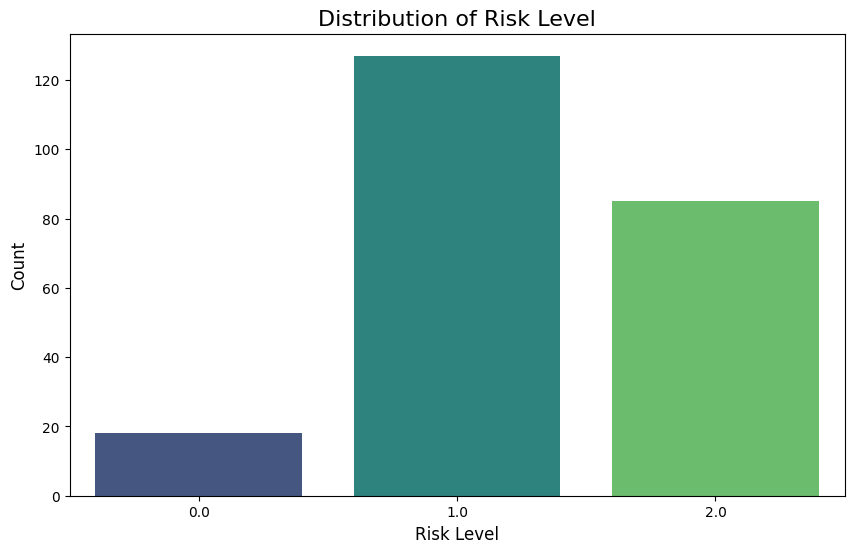

In [110]:

df.head()

plt.figure(figsize=(10,6))
sns.countplot(x='Risk_Level', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Risk Level', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [111]:
import joblib
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [112]:
from sklearn.model_selection import train_test_split
df['Risk_Level'] = df['Risk_Level'].fillna(df['Risk_Level'].mode()[0])

X = df.drop(columns=['prognosis'])
Y = df['prognosis'] 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")
print(X.shape)  # Shape of features
print(y.shape)  # Shape of target



Training set size: (243, 21), Test set size: (61, 21)
(304, 21)
(304,)


In [113]:

from sklearn.metrics import accuracy_score
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.90322581 0.80645161 0.70967742 0.74193548 0.86666667 0.8
 0.6        0.76666667 0.8        0.8       ]
Mean Score: 0.7794623655913978
Gaussian NB
Scores: [0.90322581 0.70967742 0.70967742 0.70967742 0.73333333 0.8
 0.63333333 0.8        0.83333333 0.76666667]
Mean Score: 0.7598924731182796
Random Forest
Scores: [0.87096774 0.83870968 0.74193548 0.77419355 0.83333333 0.86666667
 0.63333333 0.76666667 0.76666667 0.8       ]
Mean Score: 0.789247311827957


In [117]:
print(X.shape)

(304, 21)


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define SVC and the hyperparameter grid
svc = SVC()

svc_param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization strength
    'gamma': [1, 0.1, 0.01, 0.001],   # Kernel coefficient
    'kernel': ['rbf', 'linear']        # RBF kernel, linear kernel
}

# Initialize GridSearchCV
svc_grid = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit on training data
svc_grid.fit(X_train, y_train)

# Print best hyperparameters and best score (from cross-validation on training data)
print("Best SVC Parameters:", svc_grid.best_params_)
print("Best SVC Cross-Validation Score:", svc_grid.best_score_)

# --- Training Set Accuracy ---
train_accuracy = svc_grid.score(X_train, y_train)
print("\nTraining Set Accuracy:", train_accuracy)

# --- Test Set Accuracy ---
test_accuracy = svc_grid.score(X_test, y_test)
print("\nTest Set Accuracy:", test_accuracy)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest and the hyperparameter grid
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit on training data
rf_grid.fit(X_train, y_train)

print("Best RF Parameters:", rf_grid.best_params_)
print("Best RF Score:", rf_grid.best_score_)


# Train Set Accuracy
train_accuracy = accuracy_score(y_train, rf_grid.predict(X_train))
print(f"Training Set Accuracy: {train_accuracy}")

# Test Set Accuracy
test_accuracy = accuracy_score(y_test, rf_grid.predict(X_test))
print(f"Test Set Accuracy: {test_accuracy}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

In [120]:
import joblib

best_svc_model = svc_grid.best_estimator_
joblib.dump(best_svc_model, 'svc_model.joblib')
best_rf_model = rf_grid.best_estimator_
joblib.dump(best_rf_model, 'rf_model.joblib')



['rf_model.joblib']

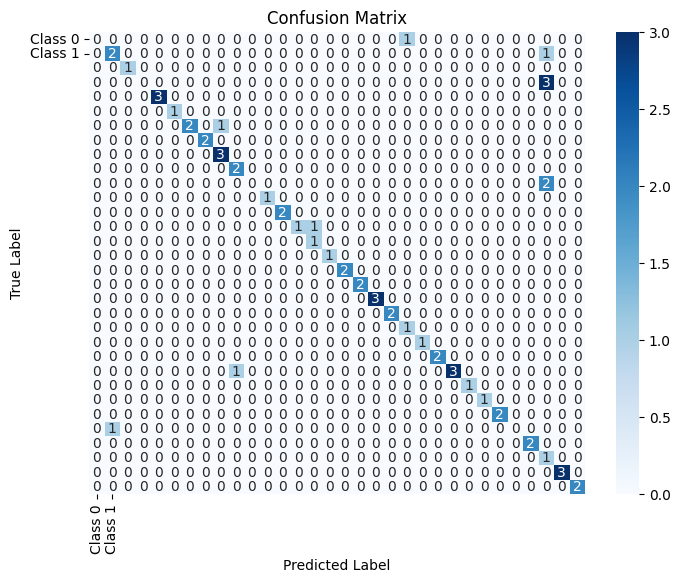

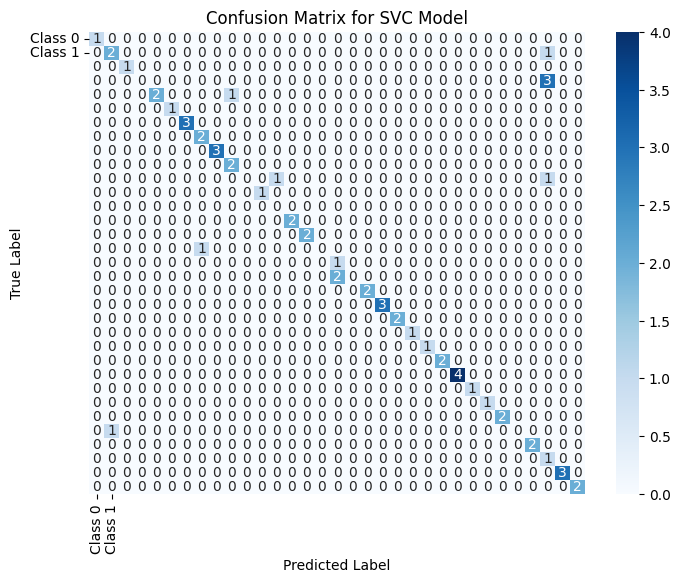

In [122]:
# --- Confusion Matrix ---
y_pred = best_rf_model.predict(X_test)  # Get the predictions for the test set

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_pred = best_svc_model.predict(X_test)  # Get the predictions for the test set

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for SVC Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()